## Zigbang 원룸 매물 데이터 수집

In [5]:
import requests
import pandas as pd

#### Process
    - 동이름으로 위도 경도 구하기
    - 위도 경도로 geohash 알아내기
    - geohash로 매물 아이디 가져오기
    - 매물 아이디로 매물 정보 가져오기

In [6]:
# url encode
# https://meyerweb.com/eric/tools/dencoder/

### 1\. 동이름으로 위도 경도 구하기

In [7]:
addr = "망원동" # 마포구 망원동, 더 정확
url = f"https://apis.zigbang.com/v2/search?leaseYn=N&q={addr}&serviceType=원룸"
response = requests.get(url)
data = response.json()['items'][0]
lat, lng = data["lat"], data["lng"]
lat, lng

(37.556785583496094, 126.9013442993164)

### 2\. 위도 경도로 geohash 알아내기

In [8]:
# install geohash2
# !pip install geohash2

In [9]:
import geohash2 # 위도/경도정보로 영역정보를 가져오기 / 영역 범위를 나타내는코드

In [10]:
# precision 영역범위 커질수록 영역이 작아짐
geohash = geohash2.encode(lat, lng, precision=5) # 망원동보다 넓은범위 가져와서 뒤에서 필터링하기
geohash # 영역 범위를 나타내는코드

'wydjx'

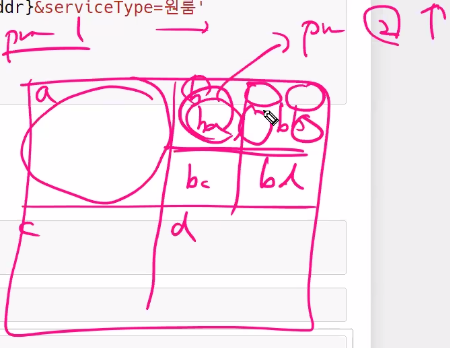

### 3\. geohash로 매물 아이디 가져오기

In [11]:
url = f'https://apis.zigbang.com/v2/items/oneroom?\
geohash={geohash}&depositMin=0&rentMin=0&salesTypes[0]=전세\
&salesTypes[1]=월세&domain=zigbang&checkAnyItemWithoutFilter=true'

response = requests.get(url) # 여기 get인이유 : 홈페이지 제작을 그렇게해둠
response

<Response [200]>

In [12]:
items = response.json()['items']
ids = [item['itemId'] for item in items]
len(ids), ids[:5]

(677, [40042434, 40058332, 40114131, 40184360, 40177503])

### 4\. 매물 아이디로 매물 정보 가져오기

In [22]:
url = 'https://apis.zigbang.com/v2/items/list'
params = {'domain': 'zigbang', 'item_ids': ids[:900]}
response = requests.post(url, params)


In [ ]:
datas = response.json()["items"]  # [0] 없는이유 : 전부 가져오기위함 / 여기선 어짜피 리스트가 하나만 있음

df = pd.DataFrame(datas)
df = df[ df['address1'].str.contains(addr)].reset_index(drop=True) # address1에 망원동이 있는컬럼만 가져오기
columns = ["item_id", "sales_type", "deposit", "rent", "size_m2", "title", "manage_cost"]
df = df[columns]
df.tail(2)

In [ ]:
pd.options.display.max_columns

In [ ]:
pd.options.display.max_rows

In [ ]:
pd.options.display.max_columns = 40
# pd.options.display.max_rows = 

In [ ]:
%ls

In [ ]:
# 스페셜 커멘드 / 주피터노트북 제공 명령어 / 아래코드로 파일만들겠다
# ipython special command

In [ ]:
%%writefile zigbang.py
import pandas as pd
import requests
import geohash2
def oneroom(addr):
    
    url = f'https://apis.zigbang.com/v2/search?leaseYn=N&q={addr}&serviceType=원룸'
    response = requests.get(url)
    data = response.json()['items'][0]
    lat, lng = data['lat'], data['lng']
    
    geohash = geohash2.encode(lat, lng, precision=5)
    
    url = f'https://apis.zigbang.com/v2/items/oneroom?\
geohash={geohash}&depositMin=0&rentMin=0&salesTypes[0]=전세&salesTypes[1]=월세\
&domain=zigbang&checkAnyItemWithoutFilter=true'
    response = requests.get(url)
    items = response.json()['items']
    ids = [item['itemId'] for item in items]
    
    url = 'https://apis.zigbang.com/v2/items/list'
    params = {'domain': 'zigbang', 'item_ids': ids[:900]}
    response = requests.post(url, params)
    items = response.json()['items']
    df = pd.DataFrame(items)
    df = df[df['address1'].str.contains(addr)].reset_index(drop=True)
    columns = ['item_id', 'address1', 'sales_type', 'deposit', 'rent', 'size_m2', 'title', 'manage_cost']
    return df[columns]

In [ ]:
%ls zigbang.py

In [ ]:
oneroom('개포동').tail()

In [ ]:
import zigbang as zb # 잘못불러왓으면 restart

In [ ]:
zb.oneroom('노원구')

In [ ]:
data1 = 1
data2 = 'py'
%whos

In [ ]:
%ls

In [ ]:
%%time
data1 =1